In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
final_match = pd.read_csv("/content/drive/MyDrive/ML_project/matches_with_average_points.csv")
player_points = pd.read_csv("/content/drive/MyDrive/ML_project/player_points.csv")
team_player = pd.read_csv("/content/drive/MyDrive/ML_project/team_player_df.csv")

In [4]:
final_match = final_match.loc[:, ~final_match.columns.str.contains('^Unnamed')]
final_match.head()

,id,city,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2,yr,team1_points,team2_points
0,335982,Bangalore,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,KKR,runs,140.0,Asad Rauf,RE Koertzen,2008,72.522727,76.775000
1,335983,Chandigarh,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,KXIP,CSK,CSK,bat,CSK,runs,33.0,MR Benson,SL Shastri,2008,100.325000,106.947368
2,335984,Delhi,MF Maharoof,Feroz Shah Kotla,0,DC,RR,RR,bat,DC,wickets,9.0,Aleem Dar,GA Pratapkumar,2008,105.676471,116.552632
3,335985,Mumbai,MV Boucher,Wankhede Stadium,0,MI,RCB,MI,bat,RCB,wickets,5.0,SJ Davis,DJ Harper,2008,80.413043,72.522727
4,335986,Kolkata,DJ Hussey,Eden Gardens,0,KKR,SRH,SRH,bat,KKR,wickets,5.0,BF Bowden,K Hariharan,2008,76.775000,86.900000


In [5]:
player_points.head()

,Unnamed: 0,Z Khan,JH Kallis,SB Joshi,BB McCullum,RT Ponting,P Kumar,DJ Hussey,AA Noffke,CL White,Mohammad Hafeez,SC Ganguly,AB Agarkar,MV Boucher,M Kartik,WP Saha,LR Shukla,I Sharma,AB Dinda,K Goel,JDP Oram,MEK Hussey,JR Hopes,MS Gony,PP Chawla,SK Raina,WA Mota,IK Pathan,S Badrinath,B Lee,ML Hayden,PA Patel,S Sreesanth,KC Sangakkara,M Muralitharan,P Amarnath,Joginder Sharma,Yuvraj Singh,SM Katich,GD McGrath,...,Milind Kumar (sub),Arshdeep Singh,SE Rutherford,Harpreet Brar,Y Prithvi Raj,O Thomas,AS Roy,S Sandeep Warrier,P Simran Singh,Anmolpreet Singh (sub),JL Pattinson,SS Cottrell,A Nortje,Ravi Bishnoi,I Udana,T Banton,D Padikkal,PK Garg,YBK Jaiswal,TU Deshpande,KL Nagarkoti,Abdul Samad,JR Philippe,Kartik Tyagi,DR Sams,Shahbaz Ahmed,RD Gaikwad,AT Carey,AS Roy (sub),JR Hazlewood,CJ Green (sub),PK Garg (sub),SP Goswami (sub),N Jagadeesan,CJ Green,P Dubey,Lalit Yadav (sub),Monu Kumar,P Negi (sub),KMA Paul (sub)
0,2008,161.5,148.0,21.5,87.5,13.5,202.0,154.0,12.0,41.5,56.0,218.0,113.5,91.0,66.0,79.5,104.0,142.0,157.0,38.5,64.0,73.5,177.0,235.0,224.5,186.5,16.5,273.5,93.0,72.5,81.0,130.5,203.5,140.5,175.5,58.5,90.5,166.5,34.5,209.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,78.5,268.5,NaN,124.5,NaN,203.0,51.5,NaN,NaN,NaN,85.0,111.0,58.5,97.0,26.5,81.0,177.0,90.5,65.0,88.0,NaN,NaN,63.0,175.5,268.5,39.0,259.5,76.5,101.0,239.5,62.0,85.5,110.0,212.5,NaN,19.5,200.0,63.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,191.0,384.5,NaN,47.0,NaN,153.5,53.0,NaN,30.0,NaN,217.0,66.5,16.0,127.0,41.0,46.5,81.0,106.0,12.0,NaN,5.0,NaN,23.0,164.5,279.0,NaN,255.0,122.5,27.5,163.5,27.0,70.5,162.5,181.0,NaN,23.5,170.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011,208.5,244.0,NaN,148.5,NaN,185.5,40.5,NaN,27.0,NaN,17.0,80.0,2.5,52.0,24.0,5.0,167.0,58.5,NaN,11.5,168.5,150.5,31.0,168.5,236.5,NaN,230.5,129.0,141.0,NaN,92.0,121.0,175.0,55.5,NaN,5.0,225.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,234.5,293.0,NaN,140.5,NaN,221.0,164.0,NaN,181.0,NaN,124.5,39.0,NaN,103.5,NaN,51.0,NaN,98.5,NaN,NaN,108.0,NaN,74.5,228.5,209.5,NaN,256.0,72.0,145.0,NaN,76.5,NaN,89.0,137.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
ActualNames = ['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions', 'Rising Pune Supergiant', 'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']

ChangedNames = ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','RPS','RPS','DC']

final_match.replace(ActualNames, ChangedNames, inplace = True)

In [7]:
matches_pred = final_match.drop(columns=['id', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'result_margin'])
matches_pred.head()


,city,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,yr,team1_points,team2_points
0,Bangalore,0,RCB,KKR,RCB,field,KKR,runs,2008,72.522727,76.775000
1,Chandigarh,0,KXIP,CSK,CSK,bat,CSK,runs,2008,100.325000,106.947368
2,Delhi,0,DC,RR,RR,bat,DC,wickets,2008,105.676471,116.552632
3,Mumbai,0,MI,RCB,MI,bat,RCB,wickets,2008,80.413043,72.522727
4,Kolkata,0,KKR,SRH,SRH,bat,KKR,wickets,2008,76.775000,86.900000


In [9]:
player_points.columns.values[0] = "year"
# player_points.drop(player_points.columns[player_points.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
player_points.fillna(0, inplace = True)
player_points.head()

,year,Z Khan,JH Kallis,SB Joshi,BB McCullum,RT Ponting,P Kumar,DJ Hussey,AA Noffke,CL White,Mohammad Hafeez,SC Ganguly,AB Agarkar,MV Boucher,M Kartik,WP Saha,LR Shukla,I Sharma,AB Dinda,K Goel,JDP Oram,MEK Hussey,JR Hopes,MS Gony,PP Chawla,SK Raina,WA Mota,IK Pathan,S Badrinath,B Lee,ML Hayden,PA Patel,S Sreesanth,KC Sangakkara,M Muralitharan,P Amarnath,Joginder Sharma,Yuvraj Singh,SM Katich,GD McGrath,...,Milind Kumar (sub),Arshdeep Singh,SE Rutherford,Harpreet Brar,Y Prithvi Raj,O Thomas,AS Roy,S Sandeep Warrier,P Simran Singh,Anmolpreet Singh (sub),JL Pattinson,SS Cottrell,A Nortje,Ravi Bishnoi,I Udana,T Banton,D Padikkal,PK Garg,YBK Jaiswal,TU Deshpande,KL Nagarkoti,Abdul Samad,JR Philippe,Kartik Tyagi,DR Sams,Shahbaz Ahmed,RD Gaikwad,AT Carey,AS Roy (sub),JR Hazlewood,CJ Green (sub),PK Garg (sub),SP Goswami (sub),N Jagadeesan,CJ Green,P Dubey,Lalit Yadav (sub),Monu Kumar,P Negi (sub),KMA Paul (sub)
0,2008,161.5,148.0,21.5,87.5,13.5,202.0,154.0,12.0,41.5,56.0,218.0,113.5,91.0,66.0,79.5,104.0,142.0,157.0,38.5,64.0,73.5,177.0,235.0,224.5,186.5,16.5,273.5,93.0,72.5,81.0,130.5,203.5,140.5,175.5,58.5,90.5,166.5,34.5,209.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2009,78.5,268.5,0.0,124.5,0.0,203.0,51.5,0.0,0.0,0.0,85.0,111.0,58.5,97.0,26.5,81.0,177.0,90.5,65.0,88.0,0.0,0.0,63.0,175.5,268.5,39.0,259.5,76.5,101.0,239.5,62.0,85.5,110.0,212.5,0.0,19.5,200.0,63.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,191.0,384.5,0.0,47.0,0.0,153.5,53.0,0.0,30.0,0.0,217.0,66.5,16.0,127.0,41.0,46.5,81.0,106.0,12.0,0.0,5.0,0.0,23.0,164.5,279.0,0.0,255.0,122.5,27.5,163.5,27.0,70.5,162.5,181.0,0.0,23.5,170.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011,208.5,244.0,0.0,148.5,0.0,185.5,40.5,0.0,27.0,0.0,17.0,80.0,2.5,52.0,24.0,5.0,167.0,58.5,0.0,11.5,168.5,150.5,31.0,168.5,236.5,0.0,230.5,129.0,141.0,0.0,92.0,121.0,175.0,55.5,0.0,5.0,225.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012,234.5,293.0,0.0,140.5,0.0,221.0,164.0,0.0,181.0,0.0,124.5,39.0,0.0,103.5,0.0,51.0,0.0,98.5,0.0,0.0,108.0,0.0,74.5,228.5,209.5,0.0,256.0,72.0,145.0,0.0,76.5,0.0,89.0,137.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#@title
# Regression Using Lag
from sklearn.linear_model import LinearRegression

reg_data = player_points.copy(deep=True)
player_points_prediction = {}

test_all = []
pred_all = []

for colNum in range(1, len(player_points.columns)):
    df = reg_data.iloc[: , [0, colNum]].copy() 
    df["Lag"] = df[reg_data.columns[colNum]].shift(1)
    
    X = df.loc[:, ['Lag']]
    X.dropna(inplace=True)  
    y = df.loc[:, reg_data.columns[colNum]]  
    y, X = y.align(X, join = 'inner')  


    x_train = X.head(11)
    y_train = y.head(11)
    x_test = X.tail(1)
    y_test = y.tail(1)

    x_train = x_train.values.reshape(-1, 1)
    
    y_train = y_train.values.reshape(-1, 1)
    x_test = x_test.values.reshape(1, -1)
    y_test = y_test.values.reshape(1, -1)

    test_all.append(y_test[0][0])

    model = LinearRegression()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    pred_all.append(y_pred[0][0])

    player_points_prediction[player_points.columns[colNum]] = y_pred[0][0]
    



In [ ]:
#@title
# # Regression using Time
# from sklearn.linear_model import LinearRegression

# reg_data = player_points.copy(deep=True)
# player_points_prediction = {}

# test_all = []
# pred_all = []

# for colNum in range(1, len(player_points.columns)):
#     df = reg_data.iloc[: , [0, colNum]].copy() 

#     train = df[df["year"] != 2020]
#     test = df[df["year"] == 2020]
    
#     x_train = train["year"].values.reshape(-1, 1)
    
#     y_train = train[player_points.columns[colNum]].values.reshape(-1, 1)
#     x_test = test["year"].values.reshape(1, -1)
#     y_test = test[player_points.columns[colNum]].values.reshape(1, -1)

#     test_all.append(y_test[0][0])

#     model = LinearRegression()
#     model.fit(x_train, y_train)

#     y_pred = model.predict(x_test)
#     pred_all.append(y_pred[0][0])

#     player_points_prediction[player_points.columns[colNum]] = y_pred[0][0]
    



In [ ]:
# # Regression using Other Player Performance
# from sklearn.linear_model import LinearRegression

# reg_data = player_points.copy(deep = True)
# player_points_prediction = {}

# test_all = []
# pred_all = []

# for colNum in range(1, len(player_points.columns)):
#     df = reg_data.drop([reg_data.columns[colNum]], axis = 1)
#     y = reg_data[reg_data.columns[colNum]]

#     x_train = df.head(11)
#     y_train = y.head(11)
#     x_test = df.tail(1)
#     y_test = y.tail(1)

#     x_train = x_train.values
#     y_train = y_train.values.reshape(-1, 1)
#     x_test = x_test.values.reshape(1, -1)
#     y_test = y_test.values.reshape(1, -1)
    
#     test_all.append(y_test[0][0])

#     model = LinearRegression()
#     model.fit(x_train, y_train)

#     y_pred = model.predict(x_test)
#     pred_all.append(y_pred[0][0])

#     player_points_prediction[player_points.columns[colNum]] = y_pred[0][0]
    



In [11]:
# Calculating mse, mae and rmse
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

print(mean_absolute_error(test_all, pred_all))
print(mean_squared_error(test_all, pred_all, squared=True))
print(mean_absolute_percentage_error(test_all, pred_all))
print(mean_squared_error(test_all, pred_all, squared=False))

32.0097390248302
23499.608272820096
4.06537968230355e+16
153.29581948905226


In [12]:
teams = matches_pred['team1'].unique()
teams

array(['RCB', 'KXIP', 'DC', 'MI', 'KKR', 'RR', 'SRH', 'CSK', 'KTK', 'RPS',
       'GL'], dtype=object)

In [ ]:
# # For the sum of all points 
# team_2020_points = {}

# for team_name in teams:
#     tot_pts = 0
#     team_members = team_player.iloc[-1][team_name]
#     if type(team_members) is str:
#         team_members = team_members.strip("{}")
#         for player in team_members.split(", "):
#             try:
#                 tot_pts += player_points_prediction[player.strip("'")]
#             except KeyError:
#                 tot_pts += 0
#     team_2020_points[team_name] = tot_pts
    




In [13]:
# For the average of all points
team_2020_points = {}

for team_name in teams:
    tot_pts = 0
    team_members = team_player.iloc[-1][team_name]
    if type(team_members) is str:
        team_members = team_members.strip("{}")
        for player in team_members.split(", "):
            try:
                tot_pts += player_points_prediction[player.strip("'")]
            except KeyError:
                tot_pts += 0
    
        team_2020_points[team_name] = tot_pts/len(team_members.split(", "))

    else:
        team_2020_points[team_name] = 0
    




In [14]:
for i in range(matches_pred[matches_pred["yr"] != 2020].shape[0], matches_pred.shape[0]):
  matches_pred.at[i, 'team1_points'] =  float(team_2020_points[matches_pred.iloc[i]['team1']])
  matches_pred.at[i, 'team2_points'] =  float(team_2020_points[matches_pred.iloc[i]['team2']])

In [15]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
matches_pred["team1"] = encoder.fit_transform(matches_pred["team1"])
matches_pred["team2"] = encoder.fit_transform(matches_pred["team2"])
matches_pred["winner"] = encoder.fit_transform(matches_pred["winner"].astype(str))
matches_pred["toss_winner"] = encoder.fit_transform(matches_pred["toss_winner"])

matches_pred['city'] = encoder.fit_transform(matches_pred['city'])
matches_pred["toss_decision"] = encoder.fit_transform(matches_pred["toss_decision"])

matches_pred["result"] = encoder.fit_transform(matches_pred["result"])


matches_pred.head()

,city,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,yr,team1_points,team2_points
0,2,0,7,3,7,1,3,0,2008,72.522727,76.775000
1,7,0,5,0,0,0,0,0,2008,100.325000,106.947368
2,10,0,1,9,9,0,1,1,2008,105.676471,116.552632
3,23,0,6,7,6,0,7,1,2008,80.413043,72.522727
4,22,0,3,10,10,0,3,1,2008,76.775000,86.900000


In [16]:
matches_pred.loc[matches_pred["winner"] == matches_pred["team1"],"team1_win"] = 1
matches_pred.loc[matches_pred["winner"] != matches_pred["team1"],"team1_win"] = 0

matches_pred.loc[matches_pred["toss_winner"] == matches_pred["team1"],"team1_toss_win"] = 1
matches_pred.loc[matches_pred["toss_winner"] != matches_pred["team1"],"team1_toss_win"] = 0


In [17]:
train = matches_pred[matches_pred['yr'] != 2020]
test = matches_pred[matches_pred['yr'] == 2020]

In [18]:
train_y = train.team1_win.values
del train["team1_win"]
del train["winner"]
del train["toss_winner"]
train_X = train.values.astype(np.float)

In [19]:
test_y = test.team1_win.values
del test["team1_win"]
del test["winner"]
del test["toss_winner"]
test_X = test.values.astype(np.float)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score

Accuracy of Logistic Regression Classifier on test set: 0.5179
0.48148148148148145
0.49056603773584906
0.5


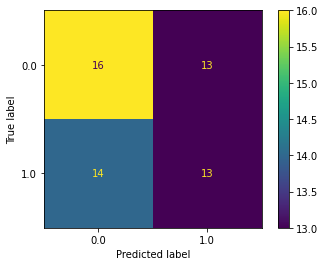

In [21]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(train_X, train_y)
pred_y = logreg.predict(test_X)

print('Accuracy of Logistic Regression Classifier on test set: {:.4f}'.format(logreg.score(test_X, test_y)))

print(precision_score(pred_y, test_y))
print(f1_score(pred_y, test_y))
print(recall_score(pred_y, test_y))

cm = confusion_matrix(test_y, pred_y, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()
plt.show()


In [22]:
logreg.coef_

array([[-8.56199773e-03, -1.26509799e-01,  6.38060461e-03,
        -1.39089760e-02, -3.54810975e-01, -1.86201102e-01,
        -4.81077949e-05,  2.84437210e-02, -2.07014423e-02,
         1.60550957e-01]])

Accuracy of SVM Classifier on test set: 0.4821
1.0
0.6506024096385542
0.48214285714285715


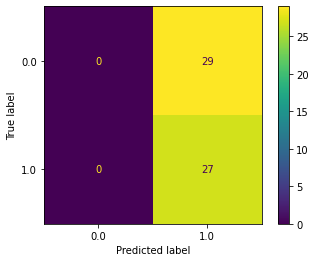

In [23]:
from sklearn import svm

model = svm.SVC()
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

print('Accuracy of SVM Classifier on test set: {:.4f}'.format(accuracy_score(test_y, pred_y)))

print(precision_score(pred_y, test_y))
print(f1_score(pred_y, test_y))
print(recall_score(pred_y, test_y))

cm = confusion_matrix(test_y, pred_y, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()
plt.show()



Accuracy of Decision Tree Classifier on test set: 0.4821
0.5555555555555556
0.5084745762711864
0.46875


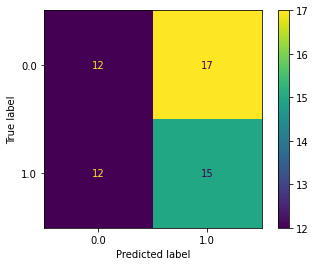

In [24]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(accuracy_score(test_y, pred_y)))

print(precision_score(pred_y, test_y))
print(f1_score(pred_y, test_y))
print(recall_score(pred_y, test_y))

cm = confusion_matrix(test_y, pred_y, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()
plt.show()



Accuracy of Adaboost Classifier on test set: 0.6607
0.7777777777777778
0.6885245901639345
0.6176470588235294


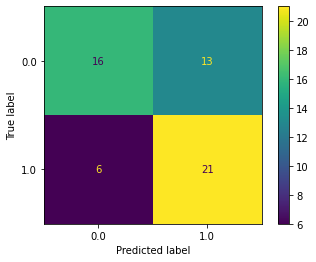

In [25]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=100)
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

print('Accuracy of Adaboost Classifier on test set: {:.4f}'.format(accuracy_score(test_y, pred_y)))

print(precision_score(pred_y, test_y))
print(f1_score(pred_y, test_y))
print(recall_score(pred_y, test_y))

cm = confusion_matrix(test_y, pred_y, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()
plt.show()



Accuracy of MLP Classifier on test set: 0.4821
1.0
0.6506024096385542
0.48214285714285715


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


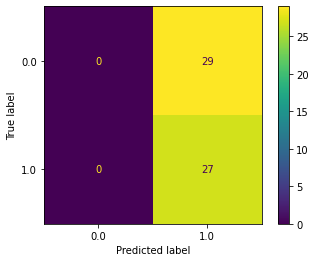

In [26]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(solver='lbfgs', max_iter = 5000000)
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

print('Accuracy of MLP Classifier on test set: {:.4f}'.format(accuracy_score(test_y, pred_y)))

print(precision_score(pred_y, test_y))
print(f1_score(pred_y, test_y))
print(recall_score(pred_y, test_y))

cm = confusion_matrix(test_y, pred_y, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()
plt.show()



Accuracy of MLP Classifier on test set: 0.5357
0.7777777777777778
0.6176470588235294
0.5121951219512195


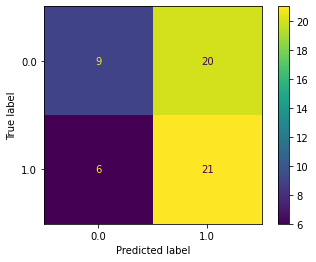

In [27]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(solver='adam', max_iter = 50000)
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

print('Accuracy of MLP Classifier on test set: {:.4f}'.format(accuracy_score(test_y, pred_y)))

print(precision_score(pred_y, test_y))
print(f1_score(pred_y, test_y))
print(recall_score(pred_y, test_y))

cm = confusion_matrix(test_y, pred_y, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()
plt.show()



Accuracy of Random Forest Classifier on test set: 0.6607
0.7037037037037037
0.6666666666666667
0.6333333333333333


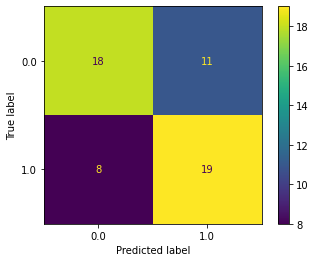

In [28]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

print('Accuracy of Random Forest Classifier on test set: {:.4f}'.format(accuracy_score(test_y, pred_y)))

print(precision_score(pred_y, test_y))
print(f1_score(pred_y, test_y))
print(recall_score(pred_y, test_y))

cm = confusion_matrix(test_y, pred_y, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()
plt.show()



In [29]:
pip install xgboost

Accuracy of XGBoost Classifier on test set: 1.0000
1.0
1.0
1.0


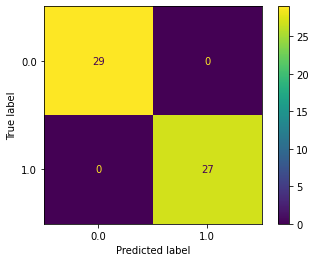

In [30]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

print('Accuracy of XGBoost Classifier on test set: {:.4f}'.format(accuracy_score(test_y, pred_y)))

print(precision_score(pred_y, test_y))
print(f1_score(pred_y, test_y))
print(recall_score(pred_y, test_y))

cm = confusion_matrix(test_y, pred_y, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()
plt.show()
